# 8장 다층 퍼셉트론

## 1. 다층 퍼셉트론의 등장

- 퍼셉트론 두 개를 한 번에 계산하여 XOR 문제를 해결
    - 퍼셉트론 두 개를 각각 처리하는 은닉층(hidden layer)을 추가
        1. $x_1, x_2$를 입력
        2. $x_1, x_2$에 NAND(부정 논리곱, 하나라도 0이면 1) 연산 수행
        3. $x_1, x_2$에 OR(논리합, 하나라도 1이면 1) 연산 수행
        4. 2와 3의 결과에 AND(논리곱, 둘 다 1이면 1) 연산 수행
        5. 4의 결과를 출력
    - 1은 입력층, 2와 3이 은닉층, 4는 출력층

## 2. 다층 퍼셉트론의 설계

- 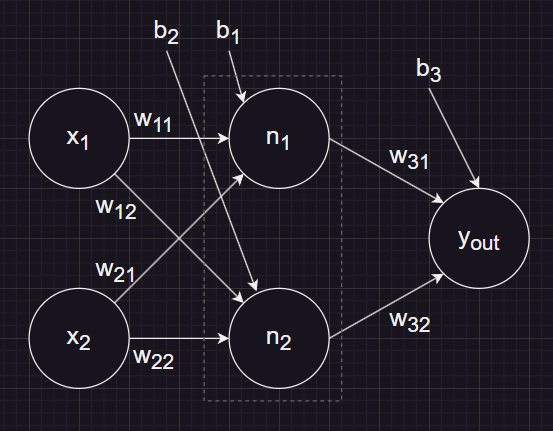
    - 노드(Node): 은닉층 내부의 $n_1, n_2$
    - 은닉층에서 계산된 값들은 활성화 함수를 통해 다음으로 전달
        - 활성화 함수가 시그모이드 함수($\sigma(x)$)라면,
        - $n_1 = \sigma(x_1 w_{11} + x_2 w_{21} + b_1)$
        - $n_2 = \sigma(x_1 w_{12} + x_2 w_{22} + b_2)$
    - 출력층에서도 마찬가지로 활성화 함수를 사용해 예측값을 결정
        - $y_{out} = \sigma(n_1 w_{31} + n_2 w_{32} + b_3)$
    - 각각의 가중치($w$)와 바이어스($b$) 값은 배열로 표현 가능
        - $W^{(1)} = \begin{bmatrix} w_{11} & w_{12} \\ w_{21} & w_{22} \\ \end{bmatrix}$
        - $W^{(2)} = \begin{bmatrix} w_{31} \\ w_{32} \\ \end{bmatrix}$
        - $B^{(1)} = \begin{bmatrix} b_1 \\ b_2 \\ \end{bmatrix}$
        - $B^{(2)} = \begin{bmatrix} b_3 \\ \end{bmatrix}$

## 3. XOR 문제의 해결

- XOR 문제를 만족하는 가중치와 바이어스의 조합은 무수히 많음
- 예시
    - $W^{(1)} = \begin{bmatrix} -2 & 2 \\ -2 & 2 \\ \end{bmatrix}$
    - $W^{(2)} = \begin{bmatrix} 1 \\ 1 \\ \end{bmatrix}$
    - $B^{(1)} = \begin{bmatrix} 3 \\ -1 \\ \end{bmatrix}$
    - $B^{(2)} = \begin{bmatrix} -1 \\ \end{bmatrix}$

## 4. 코딩으로 XOR 문제 해결하기

In [1]:
import numpy as np

# 가중치와 바이어스
w11 = np.array([-2, -2])
w12 = np.array([2, 2])
w2 = np.array([1, 1])
b1 = 3
b2 = -1
b3 = -1

In [2]:
# 퍼셉트론
def MLP(x, w, b):
    y = np.sum(w * x) + b
    if y <= 0:
        return 0
    else:
        return 1

In [3]:
# NAND 게이트
def NAND(x1, x2):
    return MLP(np.array([x1, x2]), w11, b1)


# OR 게이트
def OR(x1, x2):
    return MLP(np.array([x1, x2]), w12, b2)


# AND 게이트
def AND(x1, x2):
    return MLP(np.array([x1, x2]), w2, b3)


# XOR 게이트
def XOR(x1, x2):
    return AND(NAND(x1, x2), OR(x1, x2))

In [4]:
# x1 값, x2 값을 번갈아 대입하며 최종 값 출력
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
    y = XOR(x[0], x[1])
    print("입력 값: " + str(x) + " 출력 값: " + str(y))

입력 값: (0, 0) 출력 값: 0
입력 값: (1, 0) 출력 값: 1
입력 값: (0, 1) 출력 값: 1
입력 값: (1, 1) 출력 값: 0
